# Advanced Plotting Example

So far we have been calling *PyPlot* commands to add to and alter a **plot figure**. This figure is, in fact, a **data object** with its own built-in functions that can be accessed directly rather than through *PyPlot* commands. A **figure** will contains one or more 'axes'. Each **axis** is a plot and have their own buil-in functions for adding points, lines and text. In this example I will **steal the code** from the previous notebook and **change it** to use figures and axis objects to create the same plot as before. Contrast and compare.

## The Old Way

Below is the code stolen from the **previous** notebook. It will take a data set and produce a plot with a curve fit.

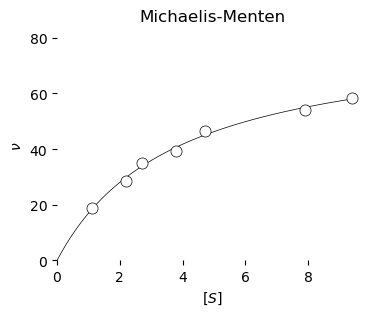

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326


In [2]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

#########################################
### Set up the data lists
#########################################

conc = [1.1, 2.2, 2.7, 3.8, 4.7, 7.9, 9.4]     ### units are mM
rates = [18.7, 28.6, 35.0,  39.4, 46.5, 54.1, 58.5]   ### units are uM/min

conc = np.array(conc)    ### Convert my lists into NumPy arrays
rates = np.array(rates)  ###  that can be used in math operations

### set x and y so that we never need to change the plotting code below

x = conc
y = rates

#########################################
### Create curve fit function
#########################################
                   
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters               ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr         ### the standard errors for slope and intercept accessed in order

#########################################
### Make a line using the calculate slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = MM_fit(x_fit, Vmax, KM)     ### calculate the y values using the function that we curve fit
            
#########################################
### Create blank plot
#########################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.figure(figsize=(4,3))           ### sets the size of the plot figure in inches

#########################################
### Plot the line using the x_fit, y_fit points
#########################################

plt.plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black')            ### the line is black

#########################################
### Plot the data with style
#########################################

plt.plot(x, y, 
        marker='o',                 ### Plot the x and y data 
        linestyle = 'None',         ### no line between markers
        markerfacecolor='white',    ### markers and lines are this color
        markeredgecolor = 'black',  ### outline of markers is this color
        markeredgewidth = 0.5,      ### outline of markers is this wide
        markersize=8)               ### markers are this big

#########################################
### Add more style
#########################################

plt.xlim(0, None)                   ### x-axis goes from 0 to 1
plt.ylim(0, 83)                     ### y-axis goes from 0 to limit of data

plt.title("Michaelis-Menten")       ### use a title
plt.xlabel(r"$[S]$")                ### label the x-axis. r means "raw" text string. $-signs are commands for the Latex math language 
plt.ylabel(r"$\nu$")                ### label y-axis. Here we use the greek letter nu for rate.

plt.gca().spines['right'].set_visible(False)   ### Make right spine invisible
plt.gca().spines['top'].set_visible(False)     ### Make top spine invisible
plt.gca().spines['left'].set_visible(False)    ### Make left spine invisible
plt.gca().spines['bottom'].set_visible(False)  ### Make bottom spine invisible

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf")     ### export the plot as this
plt.show()                  ### display the plot in this notebook

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")                   ### display the plot in this notebook

## The New Way

Below is the code above using the **object-oriented** style available in *MatPlotLib*. Rather than create a plot and send it *PyPlot* commands to add points and other elements we will create a **figure object** that contains and **axis object**.

**NOTE:** all this code is almost identical to the previous notebook.  **I stole it all**. Compare the linear fit notebook with this one and **observe where I made changes**. The major change is the function being defined for the curve fit. I also changed variable names to better describe what we are doing. That is all. 

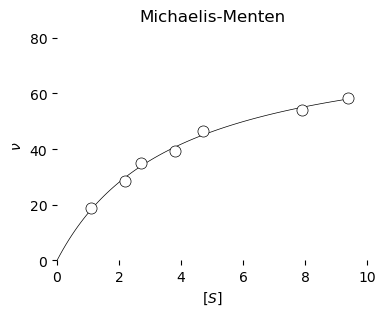

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326


In [15]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

#########################################
### Set up the data lists
#########################################

conc = [1.1, 2.2, 2.7, 3.8, 4.7, 7.9, 9.4]     ### units are mM
rates = [18.7, 28.6, 35.0,  39.4, 46.5, 54.1, 58.5]   ### units are uM/min

conc = np.array(conc)    ### Convert my lists into NumPy arrays
rates = np.array(rates)  ###  that can be used in math operations

### set x and y so that we never need to change the plotting code below

x = conc
y = rates

#########################################
### Create curve fit function
#########################################
                   
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters               ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr         ### the standard errors for slope and intercept accessed in order

#########################################
### Make a line using the calculate slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = MM_fit(x_fit, Vmax, KM)     ### calculate the y values using the function that we curve fit
            
#########################################
### Make a figure onject that contains a single axis object
### the pyplot.subplots command will ctraete these two objects
#########################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax.plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax.scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax.set(ylabel=r"$\nu$", 
        xlabel=r"$[S]$",
        title = "Michaelis-Menten",
        xlim=[0, 10],                  
        ylim=[0,83]      
      )

ax.spines['right'].set_visible(False)   ### Make right spine invisible
ax.spines['top'].set_visible(False)     ### Make top spine invisible
ax.spines['left'].set_visible(False)    ### Make left spine invisible
ax.spines['bottom'].set_visible(False)  ### Make bottom spine invisible

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show()                                       ### display the plot in this notebook

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")                   ### display the plot in this notebook

## Multiple Plots

I will steal the code above and repeat the Michaelis-Menten plot. I will also steal the code for the Lineweaver-Burke linear fit and plot **a second plot** for that in the same figure. We will have **two plots in one figure**. 

The `plt.subfigures()` is used again and this time we will set a $2 \times 1$ grid of axes rather than the single $1 \times 1$ arrangement used above. 

Examine the code below. Observe how I address each axes object. the `plt.subfigures()` function returned a figure object and a **list of two axes objects**. I will address each axes object by its position in the list. Otherwise I will plot exactly as above and make one plot in one axes object and then another in the other axes object.

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326
The slope is 0.04545 +/- 0.00151
The y-intercept is 0.01263 +/- 0.00065


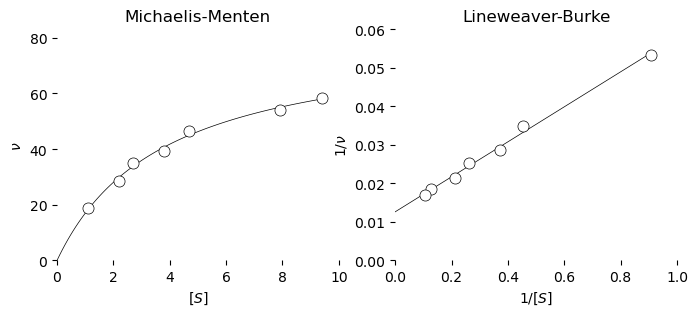

In [29]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

#########################################
### Set up the data lists
#########################################

conc = [1.1, 2.2, 2.7, 3.8, 4.7, 7.9, 9.4]     ### units are mM
rates = [18.7, 28.6, 35.0,  39.4, 46.5, 54.1, 58.5]   ### units are uM/min

conc = np.array(conc)    ### Convert my lists into NumPy arrays
rates = np.array(rates)  ###  that can be used in math operations

### set x and y so that we never need to change the plotting code below

x = conc
y = rates

#########################################
### Create curve fit function
#########################################
                   
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters               ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr         ### the standard errors for slope and intercept accessed in order

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")                   ### display the plot in this notebook

#########################################
### Make a line using the calculated vmax and KM
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = MM_fit(x_fit, Vmax, KM)     ### calculate the y values using the function that we curve fit
            
#########################################
### Make a figure onject that contains a single axis object
### the pyplot.subplots command will ctraete these two objects
#########################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))  ### Two plots in a wider figure


#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax[0].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[0].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[0].set(ylabel=r"$\nu$", 
        xlabel=r"$[S]$",
        title = "Michaelis-Menten",
        xlim=[0, 10],                  
        ylim=[0,83]      
      )

ax[0].spines['right'].set_visible(False)   ### Make right spine invisible
ax[0].spines['top'].set_visible(False)     ### Make top spine invisible
ax[0].spines['left'].set_visible(False)    ### Make left spine invisible
ax[0].spines['bottom'].set_visible(False)  ### Make bottom spine invisible

###########################################################################
####################### AND NOW, THE SECOND PLOT ##########################
###########################################################################

#########################################
### Line fit function
#########################################

x = 1 / conc
y = 1 / rates

def linear(x, slope, intercept):   ### a function that accepts a list of x values and values for slope and intercept
    y = slope * x + intercept      ### then calculates values for y
    return y                       ### and send then back as the result of the function

parameters, statistics = curve_fit(linear, x, y)

slope, intercept = parameters       ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
slope_stdev, int_stdev = perr       ### the standard errors for slope and intercept accessed in order

print(f"The slope is {slope:0.5f} +/- {slope_stdev:0.5f}")
print(f"The y-intercept is {intercept:0.5f} +/- {int_stdev:0.5f}")


#########################################
### Make a line using the calculated slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = linear(x_fit, slope, intercept)     ### calculate the y values using the function that we curve fit
            
#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax[1].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[1].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[1].set(ylabel=r"$1 / \nu$", 
        xlabel=r"$1 / [S]$",
        title = "Lineweaver-Burke",
        xlim=[0, 1.0],                  
        ylim=[0, 0.06]      
      )

ax[1].spines['right'].set_visible(False)   ### Make right spine invisible
ax[1].spines['top'].set_visible(False)     ### Make top spine invisible
ax[1].spines['left'].set_visible(False)    ### Make left spine invisible
ax[1].spines['bottom'].set_visible(False)  ### Make bottom spine invisible


#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show()                                       ### display the plot in this notebook



## More Multiple Plots

I will **steal** the code above and **repeat** the two plots. Then I will add two more plots for a total of four. Observe how this is set up in the `plt.subplots()` function at the beginning when we create a $2 \times 2$ grid of axes.

After that I just add two **copies** of the code linear plots done different ways and address the new axes accordingly. Examine the code below. 

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326
The LB slope is 0.04545 +/- 0.00151
The LB y-intercept is 0.01263 +/- 0.00065
The EH slope is -3.67490 +/- 0.29862
The EH y-intercept is 80.16888 +/- 3.41799
The HW slope is 0.01228 +/- 0.00041
The HW y-intercept is 0.04665 +/- 0.00221


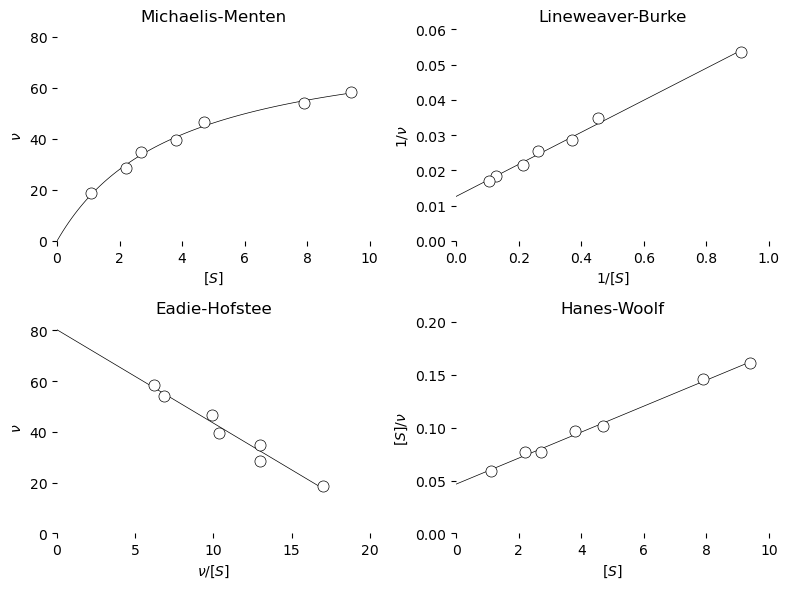

In [29]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

#########################################
### Set up the data lists
#########################################

conc = [1.1, 2.2, 2.7, 3.8, 4.7, 7.9, 9.4]     ### units are mM
rates = [18.7, 28.6, 35.0,  39.4, 46.5, 54.1, 58.5]   ### units are uM/min

conc = np.array(conc)    ### Convert my lists into NumPy arrays
rates = np.array(rates)  ###  that can be used in math operations

### set x and y so that we never need to change the plotting code below

x = conc
y = rates

#########################################
### Create curve fit function
#########################################
                   
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters               ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr         ### the standard errors for slope and intercept accessed in order

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")                   ### display the plot in this notebook

#########################################
### Make a line using the calculated vmax and KM
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = MM_fit(x_fit, Vmax, KM)     ### calculate the y values using the function that we curve fit
            
#########################################
### Make a figure onject that contains a single axis object
### the pyplot.subplots command will ctraete these two objects
#########################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6), layout = 'tight')  ### Four plots in a wider and longer figure


#########################################
### Plot the line using the x_fit, y_fit points
#########################################t

ax[0][0].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[0][0].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[0][0].set(ylabel=r"$\nu$", 
        xlabel=r"$[S]$",
        title = "Michaelis-Menten",
        xlim=[0, 10],                  
        ylim=[0,83]      
      )

ax[0][0].spines['right'].set_visible(False)   ### Make right spine invisible
ax[0][0].spines['top'].set_visible(False)     ### Make top spine invisible
ax[0][0].spines['left'].set_visible(False)    ### Make left spine invisible
ax[0][0].spines['bottom'].set_visible(False)  ### Make bottom spine invisible

###########################################################################
####################### AND NOW, THE SECOND PLOT ##########################
###########################################################################

#########################################
### Line fit function
#########################################

x = 1 / conc
y = 1 / rates

def linear(x, slope, intercept):   ### a function that accepts a list of x values and values for slope and intercept
    y = slope * x + intercept      ### then calculates values for y
    return y                       ### and send then back as the result of the function

parameters, statistics = curve_fit(linear, x, y)

slope, intercept = parameters       ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
slope_stdev, int_stdev = perr       ### the standard errors for slope and intercept accessed in order

print(f"The LB slope is {slope:0.5f} +/- {slope_stdev:0.5f}")
print(f"The LB y-intercept is {intercept:0.5f} +/- {int_stdev:0.5f}")


#########################################
### Make a line using the calculated slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = linear(x_fit, slope, intercept)     ### calculate the y values using the function that we curve fit
            
#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax[0][1].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[0][1].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[0][1].set(ylabel=r"$1 / \nu$", 
        xlabel=r"$1 / [S]$",
        title = "Lineweaver-Burke",
        xlim=[0, 1.0],                  
        ylim=[0, 0.06]      
      )

ax[0][1].spines['right'].set_visible(False)   ### Make right spine invisible
ax[0][1].spines['top'].set_visible(False)     ### Make top spine invisible
ax[0][1].spines['left'].set_visible(False)    ### Make left spine invisible
ax[0][1].spines['bottom'].set_visible(False)  ### Make bottom spine invisible





###########################################################################
####################### AND NOW, THE THIRD PLOT ##########################
###########################################################################

#########################################
### Line fit function
#########################################

x = rates / conc
y = rates 

def linear(x, slope, intercept):   ### a function that accepts a list of x values and values for slope and intercept
    y = slope * x + intercept      ### then calculates values for y
    return y                       ### and send then back as the result of the function

parameters, statistics = curve_fit(linear, x, y)

slope, intercept = parameters       ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
slope_stdev, int_stdev = perr       ### the standard errors for slope and intercept accessed in order

print(f"The EH slope is {slope:0.5f} +/- {slope_stdev:0.5f}")
print(f"The EH y-intercept is {intercept:0.5f} +/- {int_stdev:0.5f}")


#########################################
### Make a line using the calculated slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = linear(x_fit, slope, intercept)     ### calculate the y values using the function that we curve fit
            
#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax[1][0].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[1][0].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[1][0].set(ylabel=r"$\nu$",
             xlabel=r"$\nu / [S]$", 
             title = "Eadie-Hofstee",
             xlim=[0, 20],                  
             ylim=[0, None]      
           )

ax[1][0].spines['right'].set_visible(False)   ### Make right spine invisible
ax[1][0].spines['top'].set_visible(False)     ### Make top spine invisible
ax[1][0].spines['left'].set_visible(False)    ### Make left spine invisible
ax[1][0].spines['bottom'].set_visible(False)  ### Make bottom spine invisible





###########################################################################
####################### AND NOW, THE FOURTH PLOT ##########################
###########################################################################

#########################################
### Line fit function
#########################################

x = conc
y = conc / rates

def linear(x, slope, intercept):   ### a function that accepts a list of x values and values for slope and intercept
    y = slope * x + intercept      ### then calculates values for y
    return y                       ### and send then back as the result of the function

parameters, statistics = curve_fit(linear, x, y)

slope, intercept = parameters       ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
slope_stdev, int_stdev = perr       ### the standard errors for slope and intercept accessed in order

print(f"The HW slope is {slope:0.5f} +/- {slope_stdev:0.5f}")
print(f"The HW y-intercept is {intercept:0.5f} +/- {int_stdev:0.5f}")


#########################################
### Make a line using the calculated slope and intercept
#########################################

max_x = np.max(x)                   ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)  ### Make an array of 100 points between zero and the max x value
y_fit = linear(x_fit, slope, intercept)     ### calculate the y values using the function that we curve fit
            
#########################################
### Plot the line using the x_fit, y_fit points
#########################################

ax[1][1].plot(x_fit, y_fit, 
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Plot the data with style
#########################################

ax[1][1].scatter(x, y, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=64,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 1                  ### everything is in layer 1 (the top layer in this case)
        )

#########################################
### Add more style
#########################################

ax[1][1].set(ylabel=r"$[S] / \nu$", 
        xlabel=r"$[S]$",
        title = "Hanes-Woolf",
        xlim=[0, 10],                  
        ylim=[0, 0.20]      
      )

ax[1][1].spines['right'].set_visible(False)   ### Make right spine invisible
ax[1][1].spines['top'].set_visible(False)     ### Make top spine invisible
ax[1][1].spines['left'].set_visible(False)    ### Make left spine invisible
ax[1][1].spines['bottom'].set_visible(False)  ### Make bottom spine invisible



#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf")     ### export the plot as this
plt.show()                                       ### display the plot in this notebook

